In [66]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_diabetes
%matplotlib inline

In [67]:
# Load our Diabetes Dataset
diabetes = load_diabetes() # its the same as using your own dataset, but we import it from elsewhere
my_df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
my_df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930


In [68]:
# Add the target - 25 to 346
my_df['target']= diabetes.target

In [69]:
my_df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [70]:
# Split the data into X and y
X = my_df.drop('target', axis=1)
y = my_df['target']

In [71]:
from sklearn.model_selection import train_test_split
# split the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # random_state == seed

In [72]:
# Print the shape of X_train, X_test, y_train, y_test
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(353, 10) (353,)
(89, 10) (89,)


In [73]:
from sklearn.linear_model import LinearRegression

# Create a linear regression model
lr = LinearRegression()
lr

LinearRegression()

In [74]:
# Train the model on the training set (this is how the model learns)
lr.fit(X_train, y_train)

LinearRegression()

In [75]:
# Predict on the testing set
# Y_preds are predicted values of the target variable based on the features.
# Once we have those preds, we can compare them to the actual values, because we have those. 
# To evaluate the performance of the model.
y_pred = lr.predict(X_test) # X_test is everything except target column
y_pred

array([139.5475584 , 179.51720835, 134.03875572, 291.41702925,
       123.78965872,  92.1723465 , 258.23238899, 181.33732057,
        90.22411311, 108.63375858,  94.13865744, 168.43486358,
        53.5047888 , 206.63081659, 100.12925869, 130.66657085,
       219.53071499, 250.7803234 , 196.3688346 , 218.57511815,
       207.35050182,  88.48340941,  70.43285917, 188.95914235,
       154.8868162 , 159.36170122, 188.31263363, 180.39094033,
        47.99046561, 108.97453871, 174.77897633,  86.36406656,
       132.95761215, 184.53819483, 173.83220911, 190.35858492,
       124.4156176 , 119.65110656, 147.95168682,  59.05405241,
        71.62331856, 107.68284704, 165.45365458, 155.00975931,
       171.04799096,  61.45761356,  71.66672581, 114.96732206,
        51.57975523, 167.57599528, 152.52291955,  62.95568515,
       103.49741722, 109.20751489, 175.64118426, 154.60296242,
        94.41704366, 210.74209145, 120.2566205 ,  77.61585399,
       187.93203995, 206.49337474, 140.63167076, 105.59

In [76]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Evaluate the performance of the model
r2 = r2_score(y_test, y_pred) # variance of the dependent variable (TARGET) explained by the independent variables (features)
                              # How well the model fits the data, higher is better

mse = mean_squared_error(y_test, y_pred) # Average Squared distance between the predicted and actual values. Lower is better

mae = mean_absolute_error(y_test, y_pred) # Average absolute distance between the predicted and actual values. Lower is better

intercept = lr.intercept_ # starting point of the regression line on the y-axis
                          # Value of the dependent variable (target) when the independent variables (features) are zero.
                          # If possible number, target increases as features increase
                          # If negative - opposite.

In [77]:
print(f"R2: {r2} ; MSE: {mse} ; MAE: {mae} ; INTERCEPT: {intercept}")

R2: 0.4526027629719195 ; MSE: 2900.1936284934814 ; MAE: 42.79409467959994 ; INTERCEPT: 151.34560453985995


In [ ]:
# MATPLOTLIB

Text(0, 0.5, 'Predicted values')

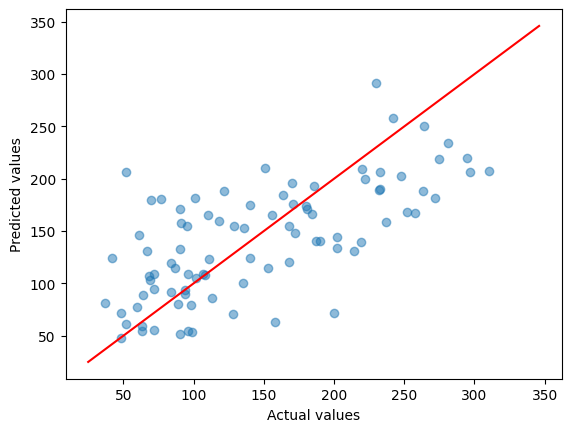

In [96]:
# Plot the predicted vs. actual values
# predicted values of the target variable are plotted on the x-axis
# actual values are plotted on the y-axis
# If the model is a good fit, the points should be close to the diagonal line, indicating strong linear relationship
# Between the actual and predicted values

import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
# plt.show()

Text(0, 0.5, 'Residuals')

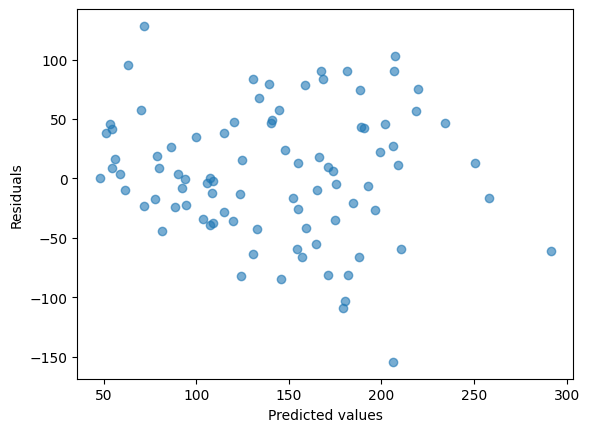

In [100]:
# Plot the residuals (остатки)
# The residuals are plotted against the predicted values of the target variable,
# So if the linear regression model is a good fit for the data,
# Then the residual plot should show random scatter of the points around zero.
# WITH NO discernable (заметный) TREND
plt.scatter(y_pred, y_test-y_pred, alpha=0.6)
plt.xlabel('Predicted values')
plt.ylabel('Residuals')